In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import calendar
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
import seaborn as sns
from scipy.stats import norm

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [3]:
# **************************
train = train[train['weather'] != 4]

In [4]:
y1 = train["casual"]
y2 = train["registered"]

In [5]:
all_data = pd.concat([train, test], ignore_index=True)

In [6]:
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [7]:
# datetime
all_data['tempDate'] = pd.to_datetime(all_data['datetime'])

all_data['hour'] = all_data['tempDate'].dt.hour
all_data['dayofweek'] = all_data['tempDate'].dt.dayofweek
# all_data['month'] = all_data['tempDate'].dt.month
all_data['year'] = all_data['tempDate'].dt.year
#all_data['weekend'] = (all_data['dayofweek'] ==5) | (all_data['dayofweek'] == 6)
all_data = all_data.drop('tempDate', axis=1)

In [8]:
# train과 test를 분류하기 위해 count는 드랍하지 않음
dropFeatures = ['datetime', 'casual', 'registered']
all_data = all_data.drop(dropFeatures, axis=1)

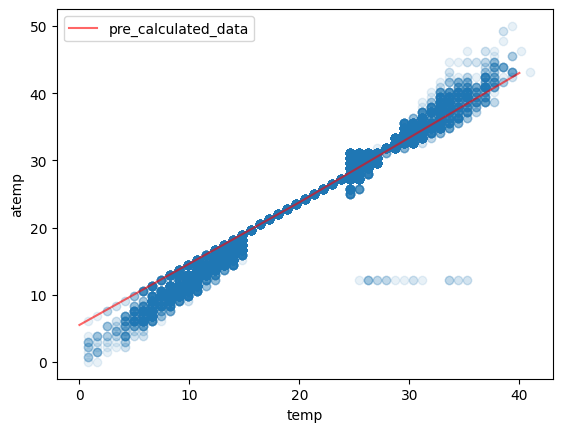

In [9]:
plt.scatter(all_data['temp'], all_data['atemp'], alpha = 0.1)
plt.plot([0,20,40],[5.5,23.75,43], 'r', alpha = 0.6, label = 'pre_calculated_data');
plt.xlabel('temp')
plt.ylabel('atemp')
plt.legend()
plt.show()

In [10]:
# error value of atemp
def predict_atemp(data):
    condition = (data.atemp < 20) & (data.temp > 20) # condition of wrong values
    data_correct_train = data[~condition]

    lin_reg = LinearRegression()
    lin_reg.fit(data_correct_train[["temp"]], data_correct_train[["atemp"]])
    predict_atemp = lin_reg.predict(data.loc[condition, ['temp']])
    
    data.loc[condition, ['atemp']] = predict_atemp

    return data

In [11]:
all_data = predict_atemp(all_data)

In [12]:
all_data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,dayofweek,year
0,1,0,0,1,9.84,14.395,81,0.0000,16.0,0,5,2011
1,1,0,0,1,9.02,13.635,80,0.0000,40.0,1,5,2011
2,1,0,0,1,9.02,13.635,80,0.0000,32.0,2,5,2011
3,1,0,0,1,9.84,14.395,75,0.0000,13.0,3,5,2011
4,1,0,0,1,9.84,14.395,75,0.0000,1.0,4,5,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,1,0,1,2,10.66,12.880,60,11.0014,NaN,19,0,2012
17374,1,0,1,2,10.66,12.880,60,11.0014,NaN,20,0,2012
17375,1,0,1,1,10.66,12.880,60,11.0014,NaN,21,0,2012
17376,1,0,1,1,10.66,13.635,56,8.9981,NaN,22,0,2012


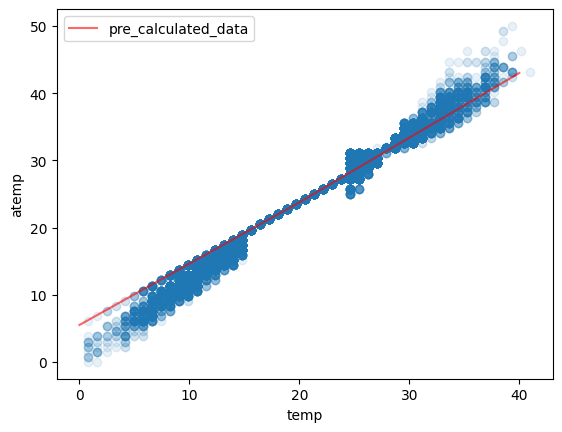

In [13]:
plt.scatter(all_data['temp'], all_data['atemp'], alpha = 0.1)
plt.plot([0,20,40],[5.5,23.75,43], 'r', alpha = 0.6, label = 'pre_calculated_data');
plt.xlabel('temp')
plt.ylabel('atemp')
plt.legend()
plt.show()

In [14]:
#PCA
from sklearn.decomposition import PCA

pca=PCA(n_components=1)
pca.fit(all_data[['temp', 'atemp']])
all_data['pca'] = pca.transform(all_data[['temp','atemp']])

In [15]:
all_data = all_data.drop(columns=['temp', 'atemp'], axis=1)

C:\Users\cch\AppData\Local\Temp\ipykernel_5944\657520404.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data['pca'], fit=norm)


<Axes: xlabel='pca', ylabel='Density'>

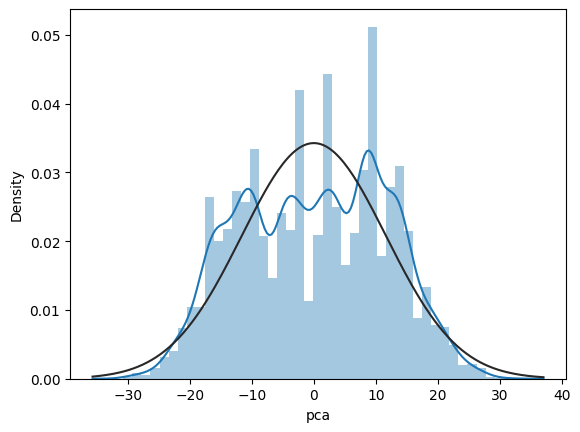

In [16]:
import seaborn as sns
from scipy.stats import norm

sns.distplot(all_data['pca'], fit=norm)

In [17]:
# windspeed
def predict_windspeed(data):
    condition = data['windspeed'] == 0
    dataWindNot0_train = data.loc[~condition]
    windColumns = ["weather", "humidity", "pca"]

    rf_reg = RandomForestRegressor(random_state=42)
    rf_reg.fit(dataWindNot0_train[windColumns], dataWindNot0_train["windspeed"])

    predictWind0 = rf_reg.predict(data.loc[condition, windColumns])

    dataWind0_windspeed = data.loc[condition, ['windspeed']]
    plt.xlabel('Before')
    plt.ylabel('After')
    plt.plot(dataWind0_windspeed, predictWind0, 'go', alpha = 0.1)
    
    data.loc[condition, ['windspeed']] = predictWind0
    
    return data

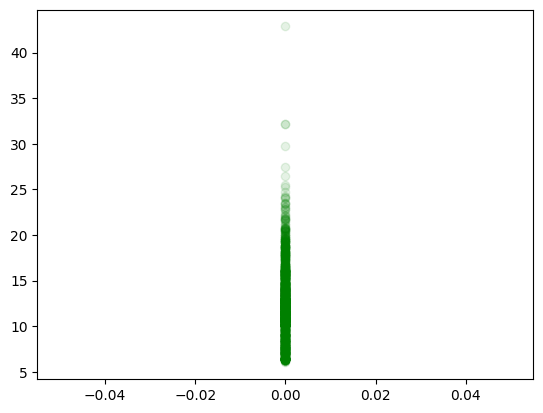

In [18]:
all_data = predict_windspeed(all_data)

In [19]:
all_data.head()

,season,holiday,workingday,weather,humidity,windspeed,count,hour,dayofweek,year,pca
0,1,0,0,1,81,7.500315,16.0,0,5,2011,-14.068810
1,1,0,0,1,80,6.424110,40.0,1,5,2011,-15.183225
2,1,0,0,1,80,6.424110,32.0,2,5,2011,-15.183225
3,1,0,0,1,75,7.594985,13.0,3,5,2011,-14.068810
4,1,0,0,1,75,7.594985,1.0,4,5,2011,-14.068810


In [20]:
# humidity
def predict_humidity(data):
    condition = data['humidity'] == 0
    dataHumNot0_train = data[~condition]

    humidityColumns = ["weather", "windspeed", "pca"]

    rf_reg = RandomForestRegressor(random_state = 42)
    rf_reg.fit(dataHumNot0_train[humidityColumns], dataHumNot0_train["humidity"])

    predictHum0 = rf_reg.predict(data.loc[condition, humidityColumns])

    dataHum0_humidity = data.loc[condition, ['humidity']]
    plt.plot(dataHum0_humidity, predictHum0, 'go', alpha = 0.1)
    
    data.loc[condition, 'humidity'] = predictHum0

    return data

C:\Users\cch\AppData\Local\Temp\ipykernel_5944\3498978843.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[78.50252381 78.50252381 78.50252381 78.00401094 84.61271032 79.07896098
 76.016      75.15162356 78.87451984 83.12587662 79.71980952 79.71980952
 92.57260714 93.4022476  86.3522286  56.69366667 88.27       88.3
 84.61271032 81.34416331 68.72489669 93.24669444]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[condition, 'humidity'] = predictHum0


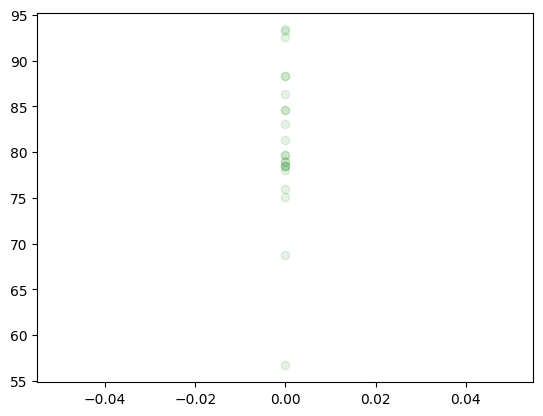

In [21]:
all_data = predict_humidity(all_data)

In [22]:
#onehot
oheFeatures = ['holiday', 'weather', 'season', 'workingday']
all_data = pd.get_dummies(all_data, columns=oheFeatures)

In [23]:
X_train = all_data[pd.notnull(all_data['count'])]
X_test = all_data[~pd.notnull(all_data['count'])]

In [24]:
X_train = X_train.drop(['count'], axis=1)
X_test = X_test.drop(['count'], axis=1)

In [25]:
X_train

,humidity,windspeed,hour,dayofweek,year,pca,holiday_0,holiday_1,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4,workingday_0,workingday_1
0,81.0,7.500315,0,5,2011,-14.068810,True,False,True,False,False,False,True,False,False,False,True,False
1,80.0,6.424110,1,5,2011,-15.183225,True,False,True,False,False,False,True,False,False,False,True,False
2,80.0,6.424110,2,5,2011,-15.183225,True,False,True,False,False,False,True,False,False,False,True,False
3,75.0,7.594985,3,5,2011,-14.068810,True,False,True,False,False,False,True,False,False,False,True,False
4,75.0,7.594985,4,5,2011,-14.068810,True,False,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,50.0,26.002700,19,2,2012,-6.282631,True,False,True,False,False,False,False,False,False,True,False,True
10881,57.0,15.001300,20,2,2012,-8.509198,True,False,True,False,False,False,False,False,False,True,False,True
10882,61.0,15.001300,21,2,2012,-10.179689,True,False,True,False,False,False,False,False,False,True,False,True
10883,61.0,6.003200,22,2,2012,-9.063855,True,False,True,False,False,False,False,False,False,True,False,True


In [26]:
# y log scaling
y1 = np.log(y1+1)
y2 = np.log(y2+1)